In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [0]:
%cd /content/drive/My\ Drive/Insight/Project/fashionbeans/

/content/drive/My Drive/Insight/Project/fashionbeans


In [5]:
mf_features =pd.read_csv('features_pd.csv')

mf_features.head()


FileNotFoundError: ignored

In [0]:
mf_features.set_index('names', drop = True,inplace = True)
mf_features.shape

KeyError: ignored

In [0]:
### Silhouette Coefficient


mf_features_norm = preprocessing.normalize(mf_features)

kmeans = KMeans(n_clusters=2, random_state=0).fit(mf_features_norm)
labels = kmeans.labels_
metrics.silhouette_score(mf_features_norm, labels, metric='euclidean')

KeyboardInterrupt: ignored

In [0]:
###Elbow




scores = [KMeans(n_clusters=i+2).fit(mf_features_norm).inertia_ 
          for i in range(15)]
fig = plt.figure()
ax = plt.axes()


ax.plot(scores)

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

NameError: ignored

In [0]:
## 3 component PCA


mf_features_scaled = preprocessing.normalize(mf_features)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(mf_features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,0.058629,0.528581,0.142925
1,-0.366648,-0.128512,0.000523
2,0.291291,-0.034369,-0.086839
3,0.284082,0.018959,-0.054127
4,-0.205813,0.081622,-0.254656
...,...,...,...
12001,0.247601,-0.060286,-0.136961
12002,-0.158530,0.130311,-0.181637
12003,-0.213059,0.088241,-0.101311
12004,0.131818,-0.009152,-0.134307


In [0]:
principalDf['names']=list(mf_features.index.values)
principalDf.set_index('names', drop=True, append=False, inplace=True)
principalDf

,principal component 1,principal component 2,principal component 3
names,,,
2+28-masked-2.jpg,0.058629,0.528581,0.142925
2+28-masked-3.jpg,-0.366648,-0.128512,0.000523
2+28-masked-4.jpg,0.291291,-0.034369,-0.086839
2+28-masked-5.jpg,0.284082,0.018959,-0.054127
2+28-masked-6.jpg,-0.205813,0.081622,-0.254656
...,...,...,...
42+23-masked-2.jpg,0.247601,-0.060286,-0.136961
42+23-masked-3.jpg,-0.158530,0.130311,-0.181637
42+23-masked-4.jpg,-0.213059,0.088241,-0.101311


In [0]:
# 2 Component PCA
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd



fig = go.Figure(data=go.Scatter(x=principalDf['principal component 1'],
                                y=principalDf['principal component 2'],
                                mode='markers',
                                text=principalDf.index)) # hover text goes here

fig.update_layout(title='2 component PCA', width=1000, height=800)

fig.show()

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

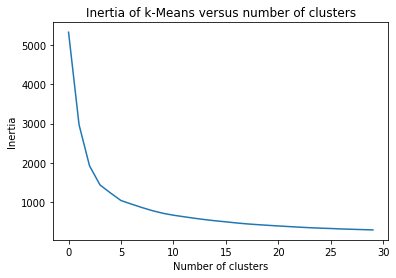

In [0]:
## Kmeans on PCA
principalDf_norm = preprocessing.normalize(principalDf)
scores = [KMeans(n_clusters=i+2).fit(principalDf_norm).inertia_ 
          for i in range(30)]
fig = plt.figure()
ax = plt.axes()


ax.plot(scores)

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [0]:
### K means with k= 3 and labelling 


mf_features_norm = preprocessing.normalize(mf_features)

kmeans = KMeans(n_clusters=3, random_state=0).fit(mf_features_norm)
labels = kmeans.labels_


In [0]:
principalDf['labels']=labels
principalDf

,principal component 1,principal component 2,principal component 3,labels
names,,,,
2+28-masked-2.jpg,0.058629,0.528581,0.142926,0
2+28-masked-3.jpg,-0.366648,-0.128512,0.000519,2
2+28-masked-4.jpg,0.291291,-0.034369,-0.086837,1
2+28-masked-5.jpg,0.284082,0.018959,-0.054128,1
2+28-masked-6.jpg,-0.205813,0.081622,-0.254653,2
...,...,...,...,...
42+23-masked-2.jpg,0.247601,-0.060286,-0.136962,1
42+23-masked-3.jpg,-0.158530,0.130312,-0.181638,2
42+23-masked-4.jpg,-0.213059,0.088241,-0.101324,2


In [0]:
#3 component pca

fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',opacity=0.3,text=principalDf.index)
fig.update_traces(marker=dict(size=4, color = 'rgba(152, 0, 0, .8)'))
fig.update_layout(title='3 component PCA', width=1000, height=800)
fig.show()

In [0]:
### User image identification and extraction 
!pip install keras_maskrcnn
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras
import keras_maskrcnn
import keras_retinanet 

# import keras_retinanet
from keras_maskrcnn import models
from keras_maskrcnn.utils.visualization import draw_mask
from keras_retinanet.utils.visualization import draw_box, draw_caption, draw_annotations
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import shutil 
import numpy as np
import time
import json



# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

     |████████████████████████████████| 61kB 3.9MB/s 
  Created wheel for keras-maskrcnn: filename=keras_maskrcnn-0.2.2-cp36-none-any.whl size=41692 sha256=bbfd296633f3e8c9b7e72c0106f95ff9b2fa90f257f62b537f0debb1b7aed7aa
  Stored in directory: /root/.cache/pip/wheels/0b/03/0e/652a317641021f3450b92b69567e64cc54597d71e809426be8
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=156780 sha256=467dae4afc2bb27bc1b9f87634f287e922c8940209848eaf73914df21097e522
  Stored in directory: /root/.cache/pip/wheels/d9/a5/98/87f8ed08913b184bb625dde1c1277a4dfe969c77b377abde69
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20485 sha256=2bb4ed628f25203adb200ef8f131c311afb135cb8bd02c59430b57e0f2e7d09c
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-maskrcnn keras-retinanet keras-resnet


Using TensorFlow backend.


In [0]:
### User image identification and extraction 

# adjust this to point to your downloaded/trained model
model_path = os.path.join('/content/drive/My Drive/Insight/Project/MAsk-RCNN', 'resnet50_modanet.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {1: 'bag', 2: 'belt', 3: 'boots', 4: 'footwear', 5: 'outer', 6: 'dress', 7: 'sunglasses', 8: 'pants', 9: 'top', 10: 'shorts', 11: 'skirt', 12: 'headwear', 13: 'scarf/tie'}








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
box_ind is deprecated, use box_indices instead







/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:335: UserWarning:

Output "filtered_detections" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "filtered_detections" during training.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:335: UserWarning:

Output "mask_submodel" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "mask_submodel" during training.

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



In [0]:
### User image identification and extraction 

def cloth_identifier_extract_text(input_imagefile):
  # load image
  image = read_image_bgr(input_imagefile)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  outputs = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  boxes  = outputs[-4][0]
  scores = outputs[-3][0]
  labels = outputs[-2][0]
  masks  = outputs[-1][0]

  # correct for image scale
  boxes /= scale

  masks_dic={}
  boxes_dic={}
  counter=0

  # visualize detections
  for box, score, label, mask in zip(boxes, scores, labels, masks):
    if score < 0.5:
        break
    

    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    mask = mask[:, :, label]
    draw_mask(draw, b, mask, color=label_color(label))
    
    masks_dic[str(counter)]=mask
    boxes_dic[str(counter)]=box

    counter+=1

    #caption = "{} {:.3f}".format(labels_to_names[label], score)
    #draw_caption(draw, b, caption)
    
  #newfileneame=input_imagefile.split(".")[0]  
  #plt.ioff()
  #plt.figure(figsize=(15, 15))
  #plt.axis('off')
  #plt.imshow(draw)
  #plt.savefig(str('maskedimages/')+str(newfileneame)+'-masked'+'.jpg',bbox_inches='tight', pad_inches=0)
  #plt.close('all')
  #cwd = os.getcwd()

  
  #print(str(cwd)+'/'+'masked'+str(newfileneame)+'.jpg')
  #plt.show()
  

   # visualize detections

  items_dic={}
  counter=0

  for box, mask in zip(boxes_dic.values(), masks_dic.values()):

    b = box.astype(int)

    # resize to fit the box
    mask = mask.astype(np.float32)
    mask = cv2.resize(mask, (b[2] - b[0], b[3] - b[1]))

    # binarize the mask
    mask = (mask > 0.5).astype(np.uint8)

    # draw the mask in the image
    mask_image = np.zeros((draw.shape[0], draw.shape[1]), np.uint8)
    mask_image[b[1]:b[3], b[0]:b[2]] = mask
    mask = mask_image

    mask = (np.stack([mask] * 3, axis = 2))*draw

    items_dic[str(counter)] = mask
    counter+=1

    newfileneame=input_imagefile.split(".")[0]
    #plt.ioff()
    #plt.figure(figsize=(15, 15))
    #plt.axis('off')
    #plt.imshow(mask)
    #plt.savefig(str('/content/drive/My Drive/Insight/Project/fashionbeans/maskeditems/')+str(newfileneame)+'-masked-'+str(counter)+'.jpg',bbox_inches='tight', pad_inches=0)
    #plt.show()
    #plt.close('all')

  return mask


processing time:  11.197357892990112


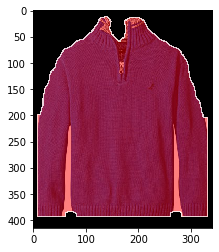

In [0]:
### User image identification and extraction 

test_mask=cloth_identifier_extract_text('/content/drive/My Drive/Insight/Project/fashionbeans/test/usertest1.jpeg')
plt.imshow(test_mask)


In [0]:
from PIL import Image
test_img= Image.fromarray(test_mask)

In [0]:
 ### Feature extraction from test image 
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from keras import Model
model = InceptionV3(weights='imagenet', pooling = 'avg', include_top=False)
model1 = Model(inputs=model.inputs, outputs=model.layers[311].output)

#model.summary()






87916544/87910968 [==============================] - 1s 0us/step


In [0]:
### Feature extraction from test image 

#img = image.load_img(test_img, target_size=(224, 224))
img_data = image.img_to_array(test_img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

test_feature = model.predict(img_data)

  
test_feature_np = np.array(test_feature)
test_feature_np = test_feature_np.flatten()
len(test_feature_np)

2048

In [0]:
test_feature_np = test_feature_np.reshape(1, -1)
print(test_feature_np.shape)

test_feature_norm = preprocessing.normalize(test_feature_np)
test_feature_norm = test_feature_norm.reshape(2048,)

print(test_feature_norm.shape)

(1, 2048)
(2048,)


In [0]:
test_feature_norm = pd.Series(test_feature_norm, index = mf_features.columns, name = 'test')
test_feature_norm

0       0.013537
1       0.025055
2       0.003945
3       0.036211
4       0.015894
          ...   
2043    0.049886
2044    0.034010
2045    0.018502
2046    0.019387
2047    0.057694
Name: test, Length: 2048, dtype: float32

In [0]:
mf_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2+28-masked-2.jpg,0.292963,0.000234,0.349291,0.225390,0.552341,0.384406,1.106968,0.289374,0.059056,0.224487,0.330342,0.134458,0.036309,0.361801,0.529934,0.642112,0.349378,0.105639,0.592969,0.336199,0.001085,0.059341,0.057119,0.364274,0.052361,0.329709,0.018186,0.026867,0.370087,0.704868,0.040456,0.401509,0.465517,0.598697,0.062692,0.402291,0.105194,0.317435,0.583350,0.333772,...,0.041303,0.008700,0.322823,0.217256,1.083543,0.810519,0.128813,0.038518,0.000000,0.089653,0.095209,1.648590,0.271067,0.484049,0.133044,0.000000,0.098972,0.321015,0.252707,1.484192,0.094104,0.093860,0.404872,0.543994,0.219630,0.377523,0.009319,0.129382,0.559762,0.080779,1.090021,0.008611,0.376602,1.211630,0.030006,0.038619,0.931040,0.069758,0.242599,0.012855
2+28-masked-3.jpg,0.024082,0.611249,0.328074,0.344005,0.578795,0.010764,0.416483,0.846321,0.147201,0.926255,0.076152,0.046123,0.070261,0.325442,0.324802,0.112189,0.069548,0.891315,0.209690,0.946106,0.559605,0.795091,1.290967,0.242937,0.024457,0.922186,0.165982,0.033686,0.032118,0.405493,0.170889,0.264947,0.383641,0.618006,0.042353,0.058144,0.008606,0.332442,0.783173,0.671515,...,0.144593,0.019579,0.373311,1.306583,0.097226,0.000000,0.074721,0.425302,0.000000,0.000000,0.178219,1.063774,0.114380,0.080498,0.140569,0.978823,0.579694,0.482947,0.000000,0.371818,0.012903,1.874271,0.000000,0.000000,0.313616,0.036154,0.893880,0.008801,0.726768,0.296521,0.443975,2.244174,0.000000,1.733019,1.666897,0.133471,1.921054,0.669140,0.558867,0.006132
2+28-masked-4.jpg,0.065327,0.026326,0.309895,0.246753,0.263633,0.005091,0.309511,0.124351,0.011416,0.029321,0.000000,0.075812,0.003912,0.728393,0.436652,0.505246,0.185159,0.133779,0.327234,0.651455,0.017709,0.110072,0.022143,0.000000,0.012508,0.101200,0.030755,0.016910,0.220965,0.223269,0.090566,0.281175,0.000000,0.475001,0.075413,0.173734,0.007706,0.045286,0.136465,0.329454,...,0.104514,0.154630,0.931152,0.051203,0.300727,0.038505,0.079314,0.005289,0.198813,0.058984,0.040934,0.858874,0.053318,0.691104,0.137561,0.062760,0.281144,0.377570,0.000000,0.055771,0.137141,0.044059,0.834085,0.515534,0.008071,0.001318,0.155444,0.249397,0.238706,0.009445,0.004061,0.696760,0.053226,0.728933,0.170821,0.007268,0.349960,0.035479,0.000000,0.002120
2+28-masked-5.jpg,0.071181,0.089520,0.271692,0.243964,0.320480,0.000000,0.276896,0.163015,0.023578,0.086659,0.004338,0.067762,0.001968,0.574487,0.556710,0.557137,0.179297,0.199595,0.278228,0.592763,0.019572,0.151617,0.007185,0.000000,0.021576,0.243509,0.037609,0.040244,0.146192,0.147188,0.093517,0.228476,0.038158,0.419932,0.159094,0.156568,0.033225,0.000000,0.142564,0.162718,...,0.150572,0.041128,0.789660,0.078335,0.255532,0.018525,0.005324,0.068639,0.124828,0.000000,0.006341,0.875554,0.050566,0.686547,0.185302,0.131241,0.237503,0.096694,0.000000,0.136010,0.068106,0.180759,0.721657,0.455660,0.000000,0.229321,0.130974,0.167529,0.118610,0.047353,0.098701,0.644625,0.060228,0.703980,0.203200,0.021226,0.503772,0.008741,0.000000,0.139069
2+28-masked-6.jpg,0.040924,0.000000,0.205713,0.127775,0.066336,0.114027,0.349052,0.154090,0.017857,0.353766,0.157807,0.120353,0.000000,0.637400,0.800324,1.185015,0.103040,0.225700,0.002241,0.990746,0.061340,0.087463,0.367005,0.263966,0.188313,0.119551,0.011481,0.140720,0.054004,0.364359,0.926769,0.166130,0.221353,0.098845,0.626729,0.031713,0.060448,0.294438,0.487728,0.016633,...,0.499152,1.462144,1.480201,0.766618,0.061104,0.020337,0.287790,0.084297,0.317540,0.006769,0.320908,0.269400,0.145094,1.094262,0.098124,0.547979,0.000000,0.381243,0.055772,0.810716,1.638107,0.138410,0.009761,0.098520,0.000000,0.243885,0.000000,0.369

In [0]:
### combining test image with features dataframe 
#user_feature_norm = pd.Series(user_feature_norm)
#combo_features=

features_withtest = mf_features.append(test_feature_norm)
features_withtest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2+28-masked-2.jpg,0.292963,0.000234,0.349291,0.225390,0.552341,0.384406,1.106968,0.289374,0.059056,0.224487,0.330342,0.134458,0.036309,0.361801,0.529934,0.642112,0.349378,0.105639,0.592969,0.336199,0.001085,0.059341,0.057119,0.364274,0.052361,0.329709,0.018186,0.026867,0.370087,0.704868,0.040456,0.401509,0.465517,0.598697,0.062692,0.402291,0.105194,0.317435,0.583350,0.333772,...,0.041303,0.008700,0.322823,0.217256,1.083543,0.810519,0.128813,0.038518,0.000000,0.089653,0.095209,1.648590,0.271067,0.484049,0.133044,0.000000,0.098972,0.321015,0.252707,1.484192,0.094104,0.093860,0.404872,0.543994,0.219630,0.377523,0.009319,0.129382,0.559762,0.080779,1.090021,0.008611,0.376602,1.211630,0.030006,0.038619,0.931040,0.069758,0.242599,0.012855
2+28-masked-3.jpg,0.024082,0.611249,0.328074,0.344005,0.578795,0.010764,0.416483,0.846321,0.147201,0.926255,0.076152,0.046123,0.070261,0.325442,0.324802,0.112189,0.069548,0.891315,0.209690,0.946106,0.559605,0.795091,1.290967,0.242937,0.024457,0.922186,0.165982,0.033686,0.032118,0.405493,0.170889,0.264947,0.383641,0.618006,0.042353,0.058144,0.008606,0.332442,0.783173,0.671515,...,0.144593,0.019579,0.373311,1.306583,0.097226,0.000000,0.074721,0.425302,0.000000,0.000000,0.178219,1.063774,0.114380,0.080498,0.140569,0.978823,0.579694,0.482947,0.000000,0.371818,0.012903,1.874271,0.000000,0.000000,0.313616,0.036154,0.893880,0.008801,0.726768,0.296521,0.443975,2.244174,0.000000,1.733019,1.666897,0.133471,1.921054,0.669140,0.558867,0.006132
2+28-masked-4.jpg,0.065327,0.026326,0.309895,0.246753,0.263633,0.005091,0.309511,0.124351,0.011416,0.029321,0.000000,0.075812,0.003912,0.728393,0.436652,0.505246,0.185159,0.133779,0.327234,0.651455,0.017709,0.110072,0.022143,0.000000,0.012508,0.101200,0.030755,0.016910,0.220965,0.223269,0.090566,0.281175,0.000000,0.475001,0.075413,0.173734,0.007706,0.045286,0.136465,0.329454,...,0.104514,0.154630,0.931152,0.051203,0.300727,0.038505,0.079314,0.005289,0.198813,0.058984,0.040934,0.858874,0.053318,0.691104,0.137561,0.062760,0.281144,0.377570,0.000000,0.055771,0.137141,0.044059,0.834085,0.515534,0.008071,0.001318,0.155444,0.249397,0.238706,0.009445,0.004061,0.696760,0.053226,0.728933,0.170821,0.007268,0.349960,0.035479,0.000000,0.002120
2+28-masked-5.jpg,0.071181,0.089520,0.271692,0.243964,0.320480,0.000000,0.276896,0.163015,0.023578,0.086659,0.004338,0.067762,0.001968,0.574487,0.556710,0.557137,0.179297,0.199595,0.278228,0.592763,0.019572,0.151617,0.007185,0.000000,0.021576,0.243509,0.037609,0.040244,0.146192,0.147188,0.093517,0.228476,0.038158,0.419932,0.159094,0.156568,0.033225,0.000000,0.142564,0.162718,...,0.150572,0.041128,0.789660,0.078335,0.255532,0.018525,0.005324,0.068639,0.124828,0.000000,0.006341,0.875554,0.050566,0.686547,0.185302,0.131241,0.237503,0.096694,0.000000,0.136010,0.068106,0.180759,0.721657,0.455660,0.000000,0.229321,0.130974,0.167529,0.118610,0.047353,0.098701,0.644625,0.060228,0.703980,0.203200,0.021226,0.503772,0.008741,0.000000,0.139069
2+28-masked-6.jpg,0.040924,0.000000,0.205713,0.127775,0.066336,0.114027,0.349052,0.154090,0.017857,0.353766,0.157807,0.120353,0.000000,0.637400,0.800324,1.185015,0.103040,0.225700,0.002241,0.990746,0.061340,0.087463,0.367005,0.263966,0.188313,0.119551,0.011481,0.140720,0.054004,0.364359,0.926769,0.166130,0.221353,0.098845,0.626729,0.031713,0.060448,0.294438,0.487728,0.016633,...,0.499152,1.462144,1.480201,0.766618,0.061104,0.020337,0.287790,0.084297,0.317540,0.006769,0.320908,0.269400,0.145094,1.094262,0.098124,0.547979,0.000000,0.381243,0.055772,0.810716,1.638107,0.138410,0.009761,0.098520,0.000000,0.243885,0.000000,0.369

In [0]:
features_withtest.to_csv('features_withtest.csv')

In [0]:

pca = PCA(n_components=2)
principalComponents_withtest = pca.fit_transform(features_withtest)
principalDf_withtest = pd.DataFrame(data = principalComponents_withtest, 
                                    columns = ['principal component 1', 'principal component 2'])

principalDf_withtest

,principal component 1,principal component 2
0,-5.484457,-1.851994
1,13.489375,0.446212
2,-7.254289,0.192284
3,-6.513509,-0.153878
4,2.733548,-6.858309
...,...,...
12002,2.765383,-6.135052
12003,6.266063,-7.148423
12004,-4.654069,-0.897823
12005,6.017780,0.212678


In [0]:
principalDf_withtest = principalDf_withtest.set_index(features_withtest.index)
principalDf_withtest

,principal component 1,principal component 2
names,,
2+28-masked-2.jpg,-5.484457,-1.851994
2+28-masked-3.jpg,13.489375,0.446212
2+28-masked-4.jpg,-7.254289,0.192284
2+28-masked-5.jpg,-6.513509,-0.153878
2+28-masked-6.jpg,2.733548,-6.858309
...,...,...
42+23-masked-3.jpg,2.765383,-6.135052
42+23-masked-4.jpg,6.266063,-7.148423
42+23-masked-5.jpg,-4.654069,-0.897823


In [0]:
# x and y given as array_like objects
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd



fig = go.Figure(data=go.Scatter(x=principalDf_withtest['principal component 1'],
                                y=principalDf_withtest['principal component 2'],
                                mode='markers',
                                text=principalDf_withtest.index)) # hover text goes here

fig.update_layout(title='2 component PCA', width=1000, height=800)

fig.show()

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

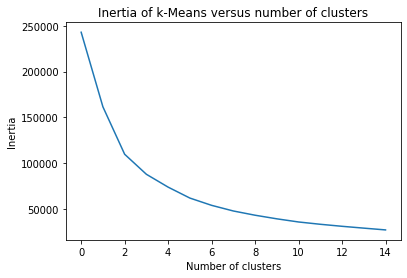

In [0]:
### Closest points to the User input


scores = [KMeans(n_clusters=i+2).fit(principalDf_withtest).inertia_ 
          for i in range(15)]
fig = plt.figure()
ax = plt.axes()


ax.plot(scores)

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [0]:
## KDTree

from sklearn.neighbors import KDTree

tree = KDTree(principalDf_withtest, leaf_size=2)
ind = tree.query(principalDf_withtest[-1:], k=3, return_distance=False)
print(ind)  # indices of 3 closest neighbors
#print(dist)  # distances to 3 closest neighbors
print(principalDf_withtest.index[ind])

[[12006  2831  8468]]
Index([['test', '37+23-masked-4.jpg', '64+14-masked-4.jpg']], dtype='object', name='names')


/content/drive/My Drive/Insight/Project/fashionbeans/maskeditems


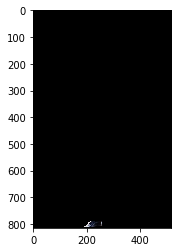

In [0]:
### Finding the closest matching images
%cd /content/drive/My Drive/Insight/Project/fashionbeans/maskeditems

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('64+14-masked-4.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
## cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(X = mf_features.to_numpy(), Y = test_feature_norm.to_numpy().reshape(1, -1))

In [0]:
fig, axes = plt.subplots(1,3,figsize=(15,3))
for i_input in range(len(cs)):
    brand = ['wellsfargo', 'aldi', 'adidas1'][i_input]
    same_idx = [ i for i,b in enumerate(brand_map) if b == all_classes.index(brand)]
    diff_idx = [ i for i,b in enumerate(brand_map) if b != all_classes.index(brand)]
    

    axes[i_input].hist(cs[i_input][diff_idx], bins=np.arange(0,1,0.01),alpha=0.5, label='All other logos')
    axes[i_input].hist(cs[i_input][same_idx], bins=np.arange(0,1,0.01),alpha=0.5, label='{} logos'.format(brand))
    axes[i_input].set(yscale='log', xlabel='Cosine similarity with test_{}'.format(brand), ylabel='Counts')
    axes[i_input].legend()